# 데이터 확인
## IRIS 데이터셋
- iris.data : 데이터 셋 (X값)
- iris.target : 분류시 레이블 값 (Y값)
- iris.target_names : 개별 레이블의 이름
- iris.feature_names : 데이터들의 이름
- iris.DESCR : 데이터 설명 

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# 데이터 가공
- 데이터셋(iris.data)를 Pandas의 DataFrame으로 바꾸고 Y값 붙이고 Y값 명칭으로 변경

In [3]:
import pandas as pd # 데이터 프레임으로 변환을 위해 임포트
import numpy as np # 고수학 연산을 위해 임포트

# feature_names 와 target을 레코드로 갖는 데이터프레임 생성
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 0.0, 1.0, 2.0으로 표현된 label을 문자열로 매핑
df['target'] = df['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

        target  
0       se

# 데이터 시각화
- seaborn을 이용한 시각화

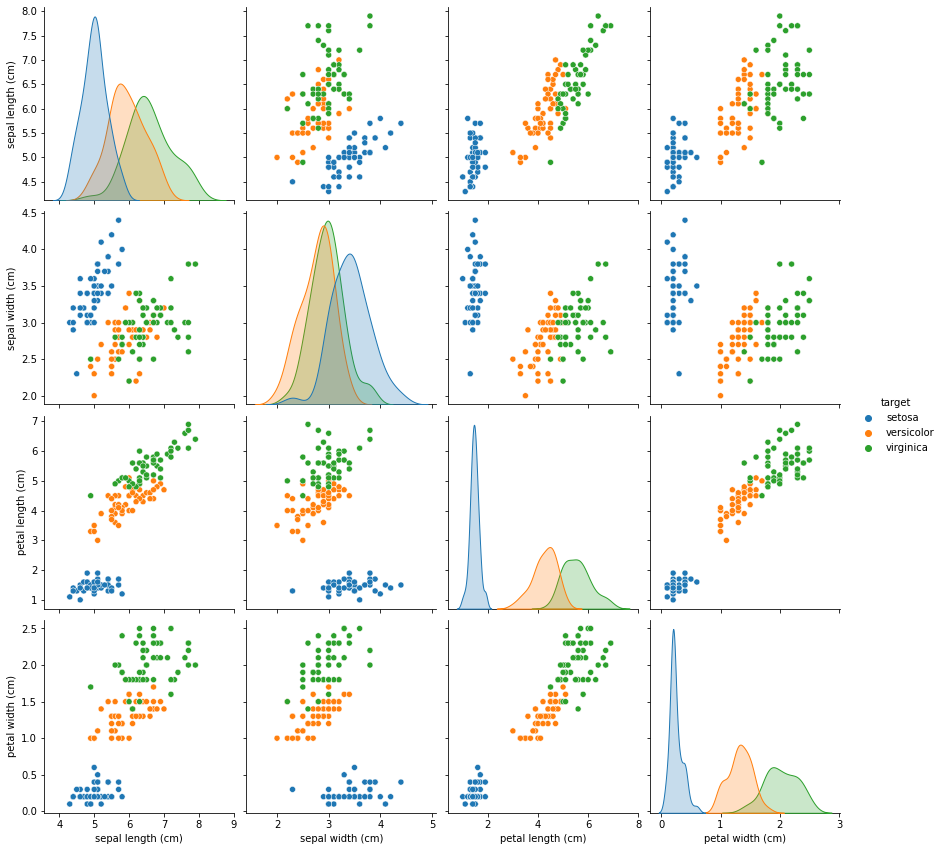

In [6]:
# 시각화를 위한 패키지 임포트
import matplotlib.pyplot as plt
import seaborn as sns

# 슬라이싱을 통해 feature와 label 분리
x_data = df.iloc[:, :-1]
y_data = df.iloc[:, [-1]]

sns.pairplot(df, hue="target", height=3)
plt.show()

# 데이터 모델링

## 분류모델링(Classifier)
- LogisticRegression
- DecisionTreeClassifier
- SVC
- GaussianNB
- KNeighborsClassifier
- RandomForestClassifier
- GradientBoostingClassifier
- MLPClassifier

In [40]:
from sklearn.linear_model import LogisticRegression #Logistic(Regression)Classifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.svm import SVC #Support Vector Machine
from sklearn.naive_bayes import GaussianNB #Naive Bayesian
from sklearn.neighbors import KNeighborsClassifier #K Nearest Neighbor
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boosing
from sklearn.neural_network import MLPClassifier #Neural Network

#logistic (Regression) Classifier, Decision tree, support vector machine, naive bayesian, K Nearest Neighbor, Random Forest, Gradient Boosing, Neural Network
models = []
models.append(("LR", LogisticRegression(max_iter=800)))
models.append(("DT", DecisionTreeClassifier()))
models.append(("SVM", SVC()))
models.append(("NB", GaussianNB()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("GB", GradientBoostingClassifier()))
models.append(("ANN", MLPClassifier(max_iter=800)))

In [41]:
from sklearn.metrics import accuracy_score

# 모델 학습 및 정확도 분석
for name, model in models:
    model.fit(x_data, y_data.values.ravel())
    y_pred = model.predict(x_data)
    print(name, "'s Accuracy is ", accuracy_score(y_data, y_pred))

LR 's Accuracy is  0.9733333333333334
DT 's Accuracy is  1.0
SVM 's Accuracy is  0.9733333333333334
NB 's Accuracy is  0.96
KNN 's Accuracy is  0.9666666666666667
RF 's Accuracy is  1.0
GB 's Accuracy is  1.0
ANN 's Accuracy is  0.98


# 교차 검증

## Y값이 정렬된 경우 계층별 K-겹 교차 검증을 해야하는 이유

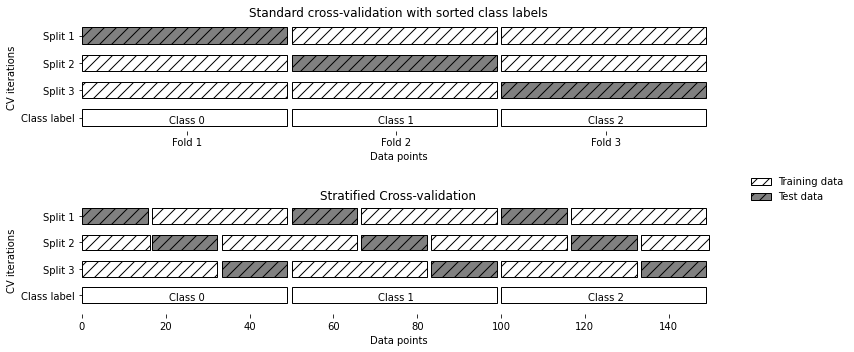

In [42]:
import mglearn
import matplotlib

plt.rcParams['axes.unicode_minus']=False 

mglearn.plots.plot_stratified_cross_validation()
plt.show()

- cross_val_score : cv - cross-vailidation splitter

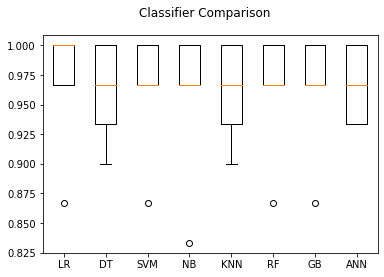

In [43]:
from sklearn import model_selection

# 교차 검증
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=7, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_data, y_data.values.ravel(), cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)

fig = plt.figure()

fig.suptitle('Classifier Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Logistic Regression

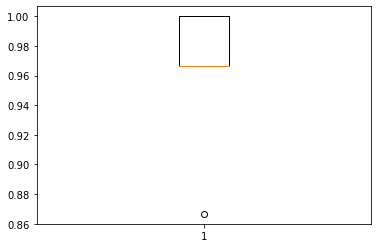

In [38]:
model = LogisticRegression(max_iter=800)
parameters = {
    'C' : [2**0, 2**3, 2**6, 2**9, 2**12],
    'random_state' : [0, 7, 13, 42]
}
gs = model_selection.GridSearchCV(model, parameters)
gs.fit(x_data, y_data.values.ravel())
model = gs.best_estimator_

kfold = model_selection.KFold(n_splits=5, random_state=7, shuffle=True)
cv_results = model_selection.cross_val_score(model, x_data, y_data.values.ravel(), cv=kfold, scoring="accuracy")
plt.boxplot(cv_results)
plt.show()